# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Eleonora

Student name: Bergamin
    
ID: 2060940

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 11614 # place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 77 70 65 49 53 53 47 70 62]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


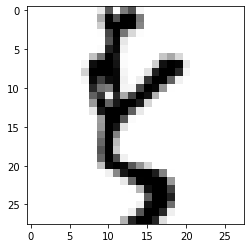

LABEL: 2
INPUT:


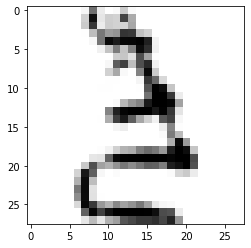

LABEL: 1
INPUT:


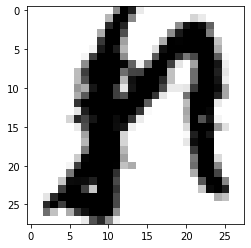

LABEL: 8
INPUT:


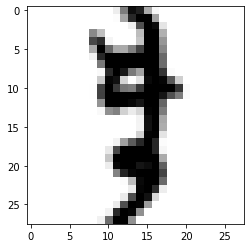

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

g = GridSearchCV(SVC(kernel = "linear"), parameters, cv = 4)
g.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", g.best_params_)

print("Score with best parameters:", g.best_score_)

print("All scores on the grid [mean_test_score]:", g.cv_results_["mean_test_score"])

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01}
Score with best parameters: 0.7283333333333334
All scores on the grid [mean_test_score]: [0.72833333 0.715      0.71333333 0.71333333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

g = GridSearchCV(SVC(kernel = "poly", degree = 2), parameters, cv = 4)
g.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", g.best_params_)

print("Score with best parameters:", g.best_score_)

print("\nAll scores on the grid [mean_test_score]:", g.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1}
Score with best parameters: 0.7566666666666666

All scores on the grid [mean_test_score]: [0.12833333 0.745      0.75666667 0.34666667 0.75666667 0.75666667
 0.745      0.75666667 0.75666667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

g = GridSearchCV(SVC(kernel = "poly", degree = degree), parameters, cv = 4)
g.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", g.best_params_)

print("Score with best parameters:", g.best_score_)

print("\nAll scores on the grid [mean_test_score]:", g.cv_results_["mean_test_score"])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1}
Score with best parameters: 0.6983333333333334

All scores on the grid [mean_test_score]: [0.12833333 0.695      0.69833333 0.32       0.69833333 0.69833333
 0.65666667 0.69833333 0.69833333]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

g = GridSearchCV(SVC(kernel = "rbf"), parameters, cv = 4)
g.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:", g.best_params_)

print("Score with best parameters:", g.best_score_)

print("\nAll scores on the grid [mean_test_score]:", g.cv_results_["mean_test_score"])

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.8

All scores on the grid [mean_test_score]: [0.12833333 0.17166667 0.12833333 0.12833333 0.55333333 0.78
 0.13666667 0.12833333 0.73       0.8        0.14833333 0.12833333
 0.73166667 0.8        0.14833333 0.12833333]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

**ANSWER QUESTION 1**

The RBF kernel has the best accuracy (0.8); the ones of linear and 2nd degree polynomial kernels are comparable, with the 2nd polynomial kernel performing slightly better. The 3rd degree polynomial is the one with the worst performances. Mean_test_score gives the mean score for each combination of the parameters: since we use the k-fold validation method, it averages the scores on the tests minus the kth fold used for validation.

Observing mean_test_score we can actually see that for each type of kernel there are different combinations of parameters in the grid for which the accuracy is similar.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel = "rbf", C = 10, gamma = 0.01) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.177000


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


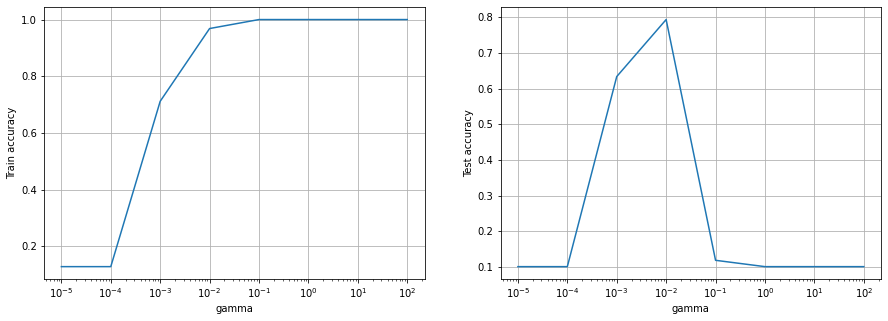

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

#from functools import partial

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gm in gamma_values:
    svm_gamma = SVC(kernel = "rbf", C = 1, gamma = gm)
    svm_gamma.fit(X_train, y_train)
    train_acc_list.append(svm_gamma.score(X_train, y_train))
    test_acc_list.append(svm_gamma.score(X_test, y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

**ANSWER QUESTION 2**

$\gamma$ is proportional to the inverse of the gaussian variance, and controls the distance in the kernel function: the more $\gamma$ increases, the more the variance decreases, and the variance controls how spread can be the points to be considered close. The smaller the variance, the closer have to be the points to be close also in the kernel function.

We can see that the training accuracy increases as $\gamma$ increase. The behavior in the test set however is different: up to a certain value of $\gamma$ ($\approx 10^{-2}$) the trend is similar to the training one and the accuracy increases. Then, as $\gamma$ gets larger we see that the error gets larger too instead of decreasing. This is the case of overfitting the training data: as $\sigma^2$ decreases the decision boundaries move closer to the data and the region fits better the data; however considering different data samples (the test set) the decision boundaries give a worse accuracy and a higher rate of misclassified samples.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [205 211 202 197 186 213 176 194 187 229]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel = "rbf", C = 10, gamma = 0.01) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.116966


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C = 1e10)
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.302362


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C = 1, max_iter = 500) #increase in max number of iterations otherwise it does not complete the task
logreg.fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.002500
Best regularized logistic regression test error: 0.261655


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

**ANSWER QUESTION 3**

We can see that in both cases the traning error is 0: this means the algorithm perfectly learned how to classify the training data. The test data, which is made of new samples, has its associated error different from zero, but with 2000 samples we see that the error decreases.
This is actually expected since we have a larger training set available, so we can find a better fit for the data.

As for logistic regression, even if in the case of no regularization the training error is 0, the performance is worse than the one of the SVM on the test set. Using regularization the results are better than without regolarization: this could mean the regularization can have avoided partially the overfitting of the data. 

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


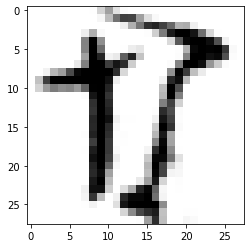

LABEL: 4
wrong LR prediction:  2
correct SVM prediction:  4


In [19]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

idx_misc = -2
i = 0

while ((idx_misc != -1) and (i < len(y_test))):
    if ((LR_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i])):
        idx_misc = -1
        plot_input(X_test,y_test, i)
        print("wrong LR prediction: ", LR_prediction[i])
        print("correct SVM prediction: ", SVM_prediction[i])
    i += 1

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
norm_confusion_SVM = confusion_SVM /counts[:,None] # I do the normalization here so I can use this matrix to plot instead of doing the same operation again

print("\n Confusion matrix SVM (normalized)   \n \n", norm_confusion_SVM )

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
norm_confusion_LR = confusion_LR /counts[:,None] # I do the normalization here so I can use this matrix to plot instead of doing the same operation again
print("\n Confusion matrix LR (normalized)   \n \n", norm_confusion_LR )

Labels and frequencies in test set:  [5795 5789 5798 5803 5814 5787 5824 5806 5813 5771]

 Confusion matrix SVM  
 
 [[5352   10    4   36   75   42    7  116  121   32]
 [  25 5102  151   62   78   13  129    5   66  158]
 [   1  109 4752  189   69   54  313   10  185  116]
 [   8   80  108 5341   39  109   15   17   66   20]
 [ 173  204  122   98 4861   30   92   28   97  109]
 [  46   57  120  151   39 5235   42   18   56   23]
 [  20  148  400   48  198   27 4781   81   86   35]
 [  38   49   69   64  151   16   65 5218   68   68]
 [  17  151   81   72   19   60   85   10 5277   41]
 [  47  109  122   19   78   20   19   18   42 5297]]

 Confusion matrix SVM (normalized)   
 
 [[0.92 0.   0.   0.01 0.01 0.01 0.   0.02 0.02 0.01]
 [0.   0.88 0.03 0.01 0.01 0.   0.02 0.   0.01 0.03]
 [0.   0.02 0.82 0.03 0.01 0.01 0.05 0.   0.03 0.02]
 [0.   0.01 0.02 0.92 0.01 0.02 0.   0.   0.01 0.  ]
 [0.03 0.04 0.02 0.02 0.84 0.01 0.02 0.   0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.9  0.01 0.   0.0

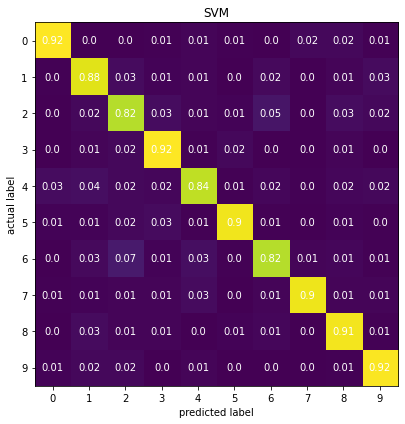

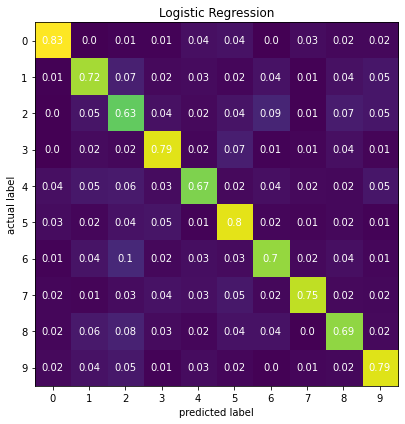

In [21]:
#code to better visualize the confusion matrix
def pltcmatrix(m, title):
    fig, ax = plt.subplots(figsize=(6,6))
    ax = plt.gca()
    ax.imshow(m)

    # We want to show all ticks...
    ax.set_xticks(np.arange(m.shape[1]))
    ax.set_yticks(np.arange(m.shape[0]))
    
    # Loop over data dimensions and create text annotations.
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            text = ax.text(j, i, round(m[i, j], 2), ha="center", va="center", color="w")
            
    ax.set_xlabel("predicted label")
    ax.set_ylabel("actual label")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    
pltcmatrix(norm_confusion_SVM, "SVM")
pltcmatrix(norm_confusion_LR, "Logistic Regression")

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


**ANSWER QUESTION 4**

The accuracy is generally quite good,but we can see that the SVM one is higher than the logistic regression accuracy.
We have that the SVM accuracy (even changing the seed) is always higher than 0.8, with the symbols with labels 1, 2, 4 and 6 the accuracy is lower than 0.9 but higher than 0.8.

Remembering the actual symbols:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

We can see for example that the hiragana 1 is usually misclassified as 4, 6 or 8, hiragana 2 as 6 or 1 and hiragana 6 as 2. The misclassification percentages for each class are amplified in the LR, which makes errors mainly on the same labels as the SVM but with a higher error rate.
We can gather then that the reason of having lower chance of getting misclassified could be simplicity (3), a charasteristic designs (9), being "composed" of different parts (1, 5).